# Wine 데이터 군집화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 데이터 정규화

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

wine_std = scaler.fit_transform(wine.data)
df_std = pd.DataFrame(wine_std, columns=wine.feature_names)
df_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### K-Means 군집화

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, random_state=11)
kmeans.fit(df_std)

KMeans(max_iter=500, n_clusters=3, random_state=11)

In [5]:
df_std['target'] = wine.target
df_std['cluster'] = kmeans.labels_
df_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,1


In [6]:
cl_result = df_std.groupby(['target', 'cluster']).count()
cl_result

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      1             59          59   59                 59         59   
1      0             65          65   65                 65         65   
       1              3           3    3                  3          3   
       2              3           3    3                  3          3   
2      2             48          48   48                 48         48   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      1                   59          59                    59   
1      0                   65          65                    65   
       1                    3           3                     3   
       2                    3           3                     3   
2      2                   48          48                    48   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      1                     59               59   59   
1      0                     65               65   65   
       1                      3                3    3   
       2                      3                3    3   
2      2                     48               48   48   

                od280/od315_of_diluted_wines  proline  
target cluster                                         
0      1                                  59       59  
1      0                                  65       65  
       1                                   3        3  
       2                                   3        3  
2      2                                  48       48

### 차원 축소, 시각화

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

wine_pca = pca.fit_transform(wine_std)

In [8]:
df_std['pca_x'] = wine_pca[:, 0]
df_std['pca_y'] = wine_pca[:, 1]
df_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,1,3.316751,-1.443463
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,1,2.209465,0.333393
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,1,2.516740,-1.031151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,1,3.757066,-2.756372
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,1,1.008908,-0.869831


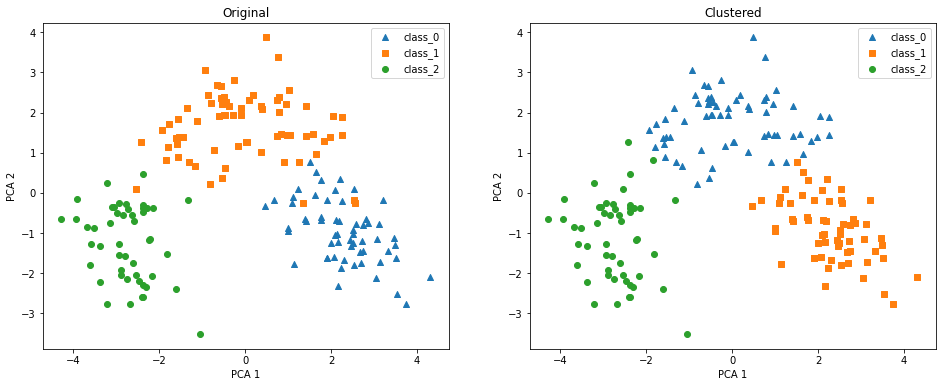

In [9]:
markers = ['^', 's', 'o']
fig, axes = plt.subplots(figsize=(16, 6), ncols=2, nrows=1)
columns_dict = {'target': 'Original', 'cluster': 'Clustered'}
for k, column in enumerate(columns_dict.keys()):
    ax = axes[k]    
    for i, marker in enumerate(markers):
        x_axis_data = df_std[df_std[column] == i]['pca_x']
        y_axis_data = df_std[df_std[column] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])
        ax.legend()
        ax.set_xlabel('PCA 1')
        ax.set_ylabel('PCA 2')
        ax.set_title(columns_dict[column])

plt.show()

### 실루엣 계수

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(df_std, df_std['cluster'])
df_std['실루엣 계수'] = score_samples
df_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,1,3.316751,-1.443463,0.536250
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,1,2.209465,0.333393,0.316715
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,1,2.516740,-1.031151,0.491395
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,1,3.757066,-2.756372,0.516966
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,1,1.008908,-0.869831,0.312548


In [11]:
df_std.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2,2,-3.370524,-2.216289,0.553911
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2,2,-2.601956,-1.757229,0.584369
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2,2,-2.677839,-2.760899,0.530066
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2,2,-2.387017,-2.297347,0.527071
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160,2,2,-3.208758,-2.768920,0.538416


In [12]:
silhouette_score(df_std, df_std['cluster'])

0.3856473325532955

In [13]:
df_std.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.289176
1    0.428634
2    0.456756
Name: 실루엣 계수, dtype: float64

### 최적 군집 수 탐색

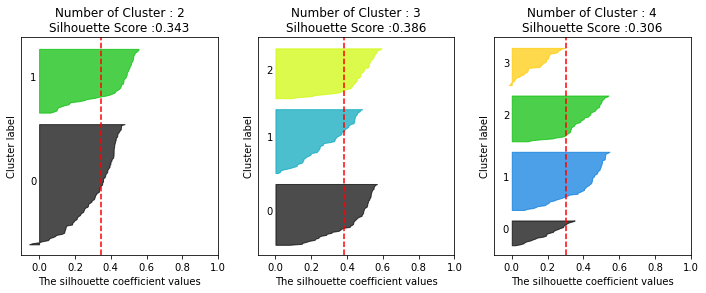

In [14]:
from visual import visualize_silhouette

visualize_silhouette([2, 3, 4], df_std)